In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [2]:
company = pd.read_csv("Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
# EDA

company.shape

(400, 11)

In [4]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
company[company.duplicated]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [8]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [9]:
# Making object column to categorical

for features in company.columns:
    if company[features].dtype=='object':
        company[features]=pd.Categorical(company[features])

company.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


In [10]:
# Label encoding for ShelveLoc and OHE for urban and US

company['ShelveLoc']=company['ShelveLoc'].map({'Medium':1,'Bad':0,'Good':2})
company['Urban']=np.where(company.Urban=='Yes',1,0);
company['US']=np.where(company.US=='Yes',1,0);

company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [11]:
X = company.drop('Sales',axis=1)
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [12]:
Y = company['Sales']
Y = pd.cut(Y.values,3,labels=['low','medium','high'])
Y

['medium', 'high', 'medium', 'medium', 'low', ..., 'high', 'medium', 'medium', 'medium', 'medium']
Length: 400
Categories (3, object): ['low' < 'medium' < 'high']

In [13]:
# Splitting data into training and testing data set

x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [14]:
# Building Decision Tree Classifier

model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

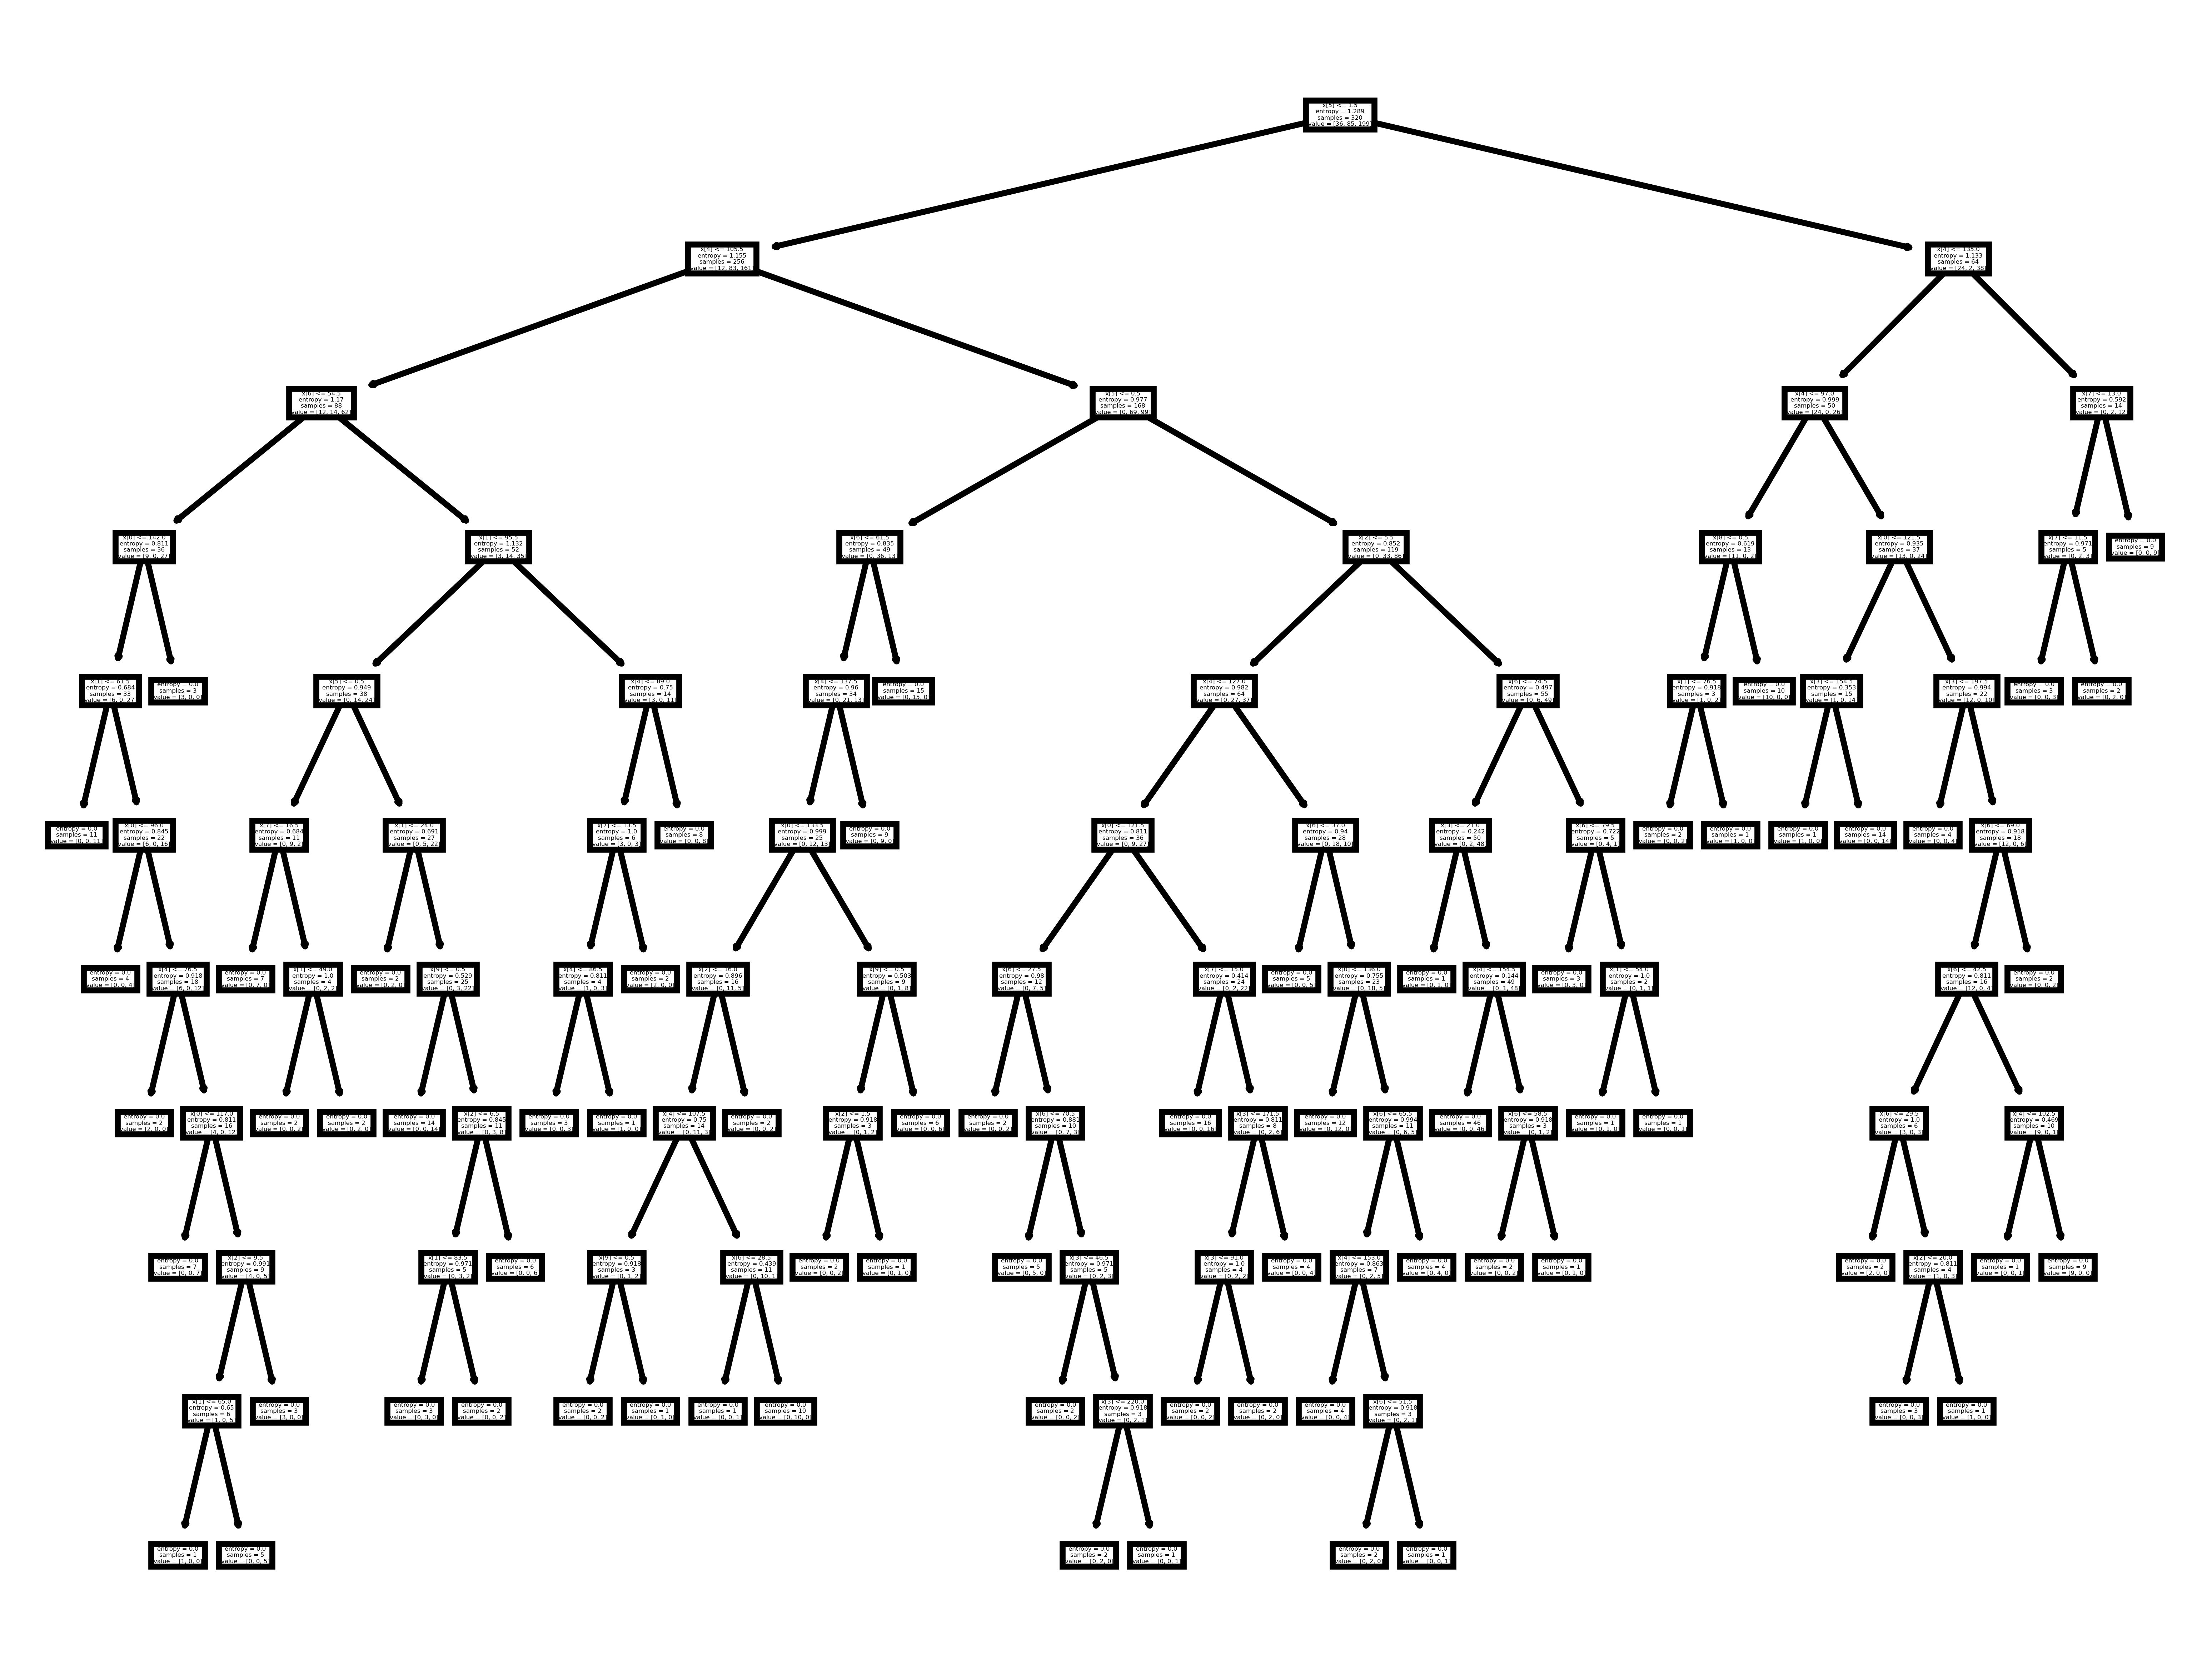

In [15]:
plt.figure(dpi=1200)
tree.plot_tree(model);

In [16]:
company.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

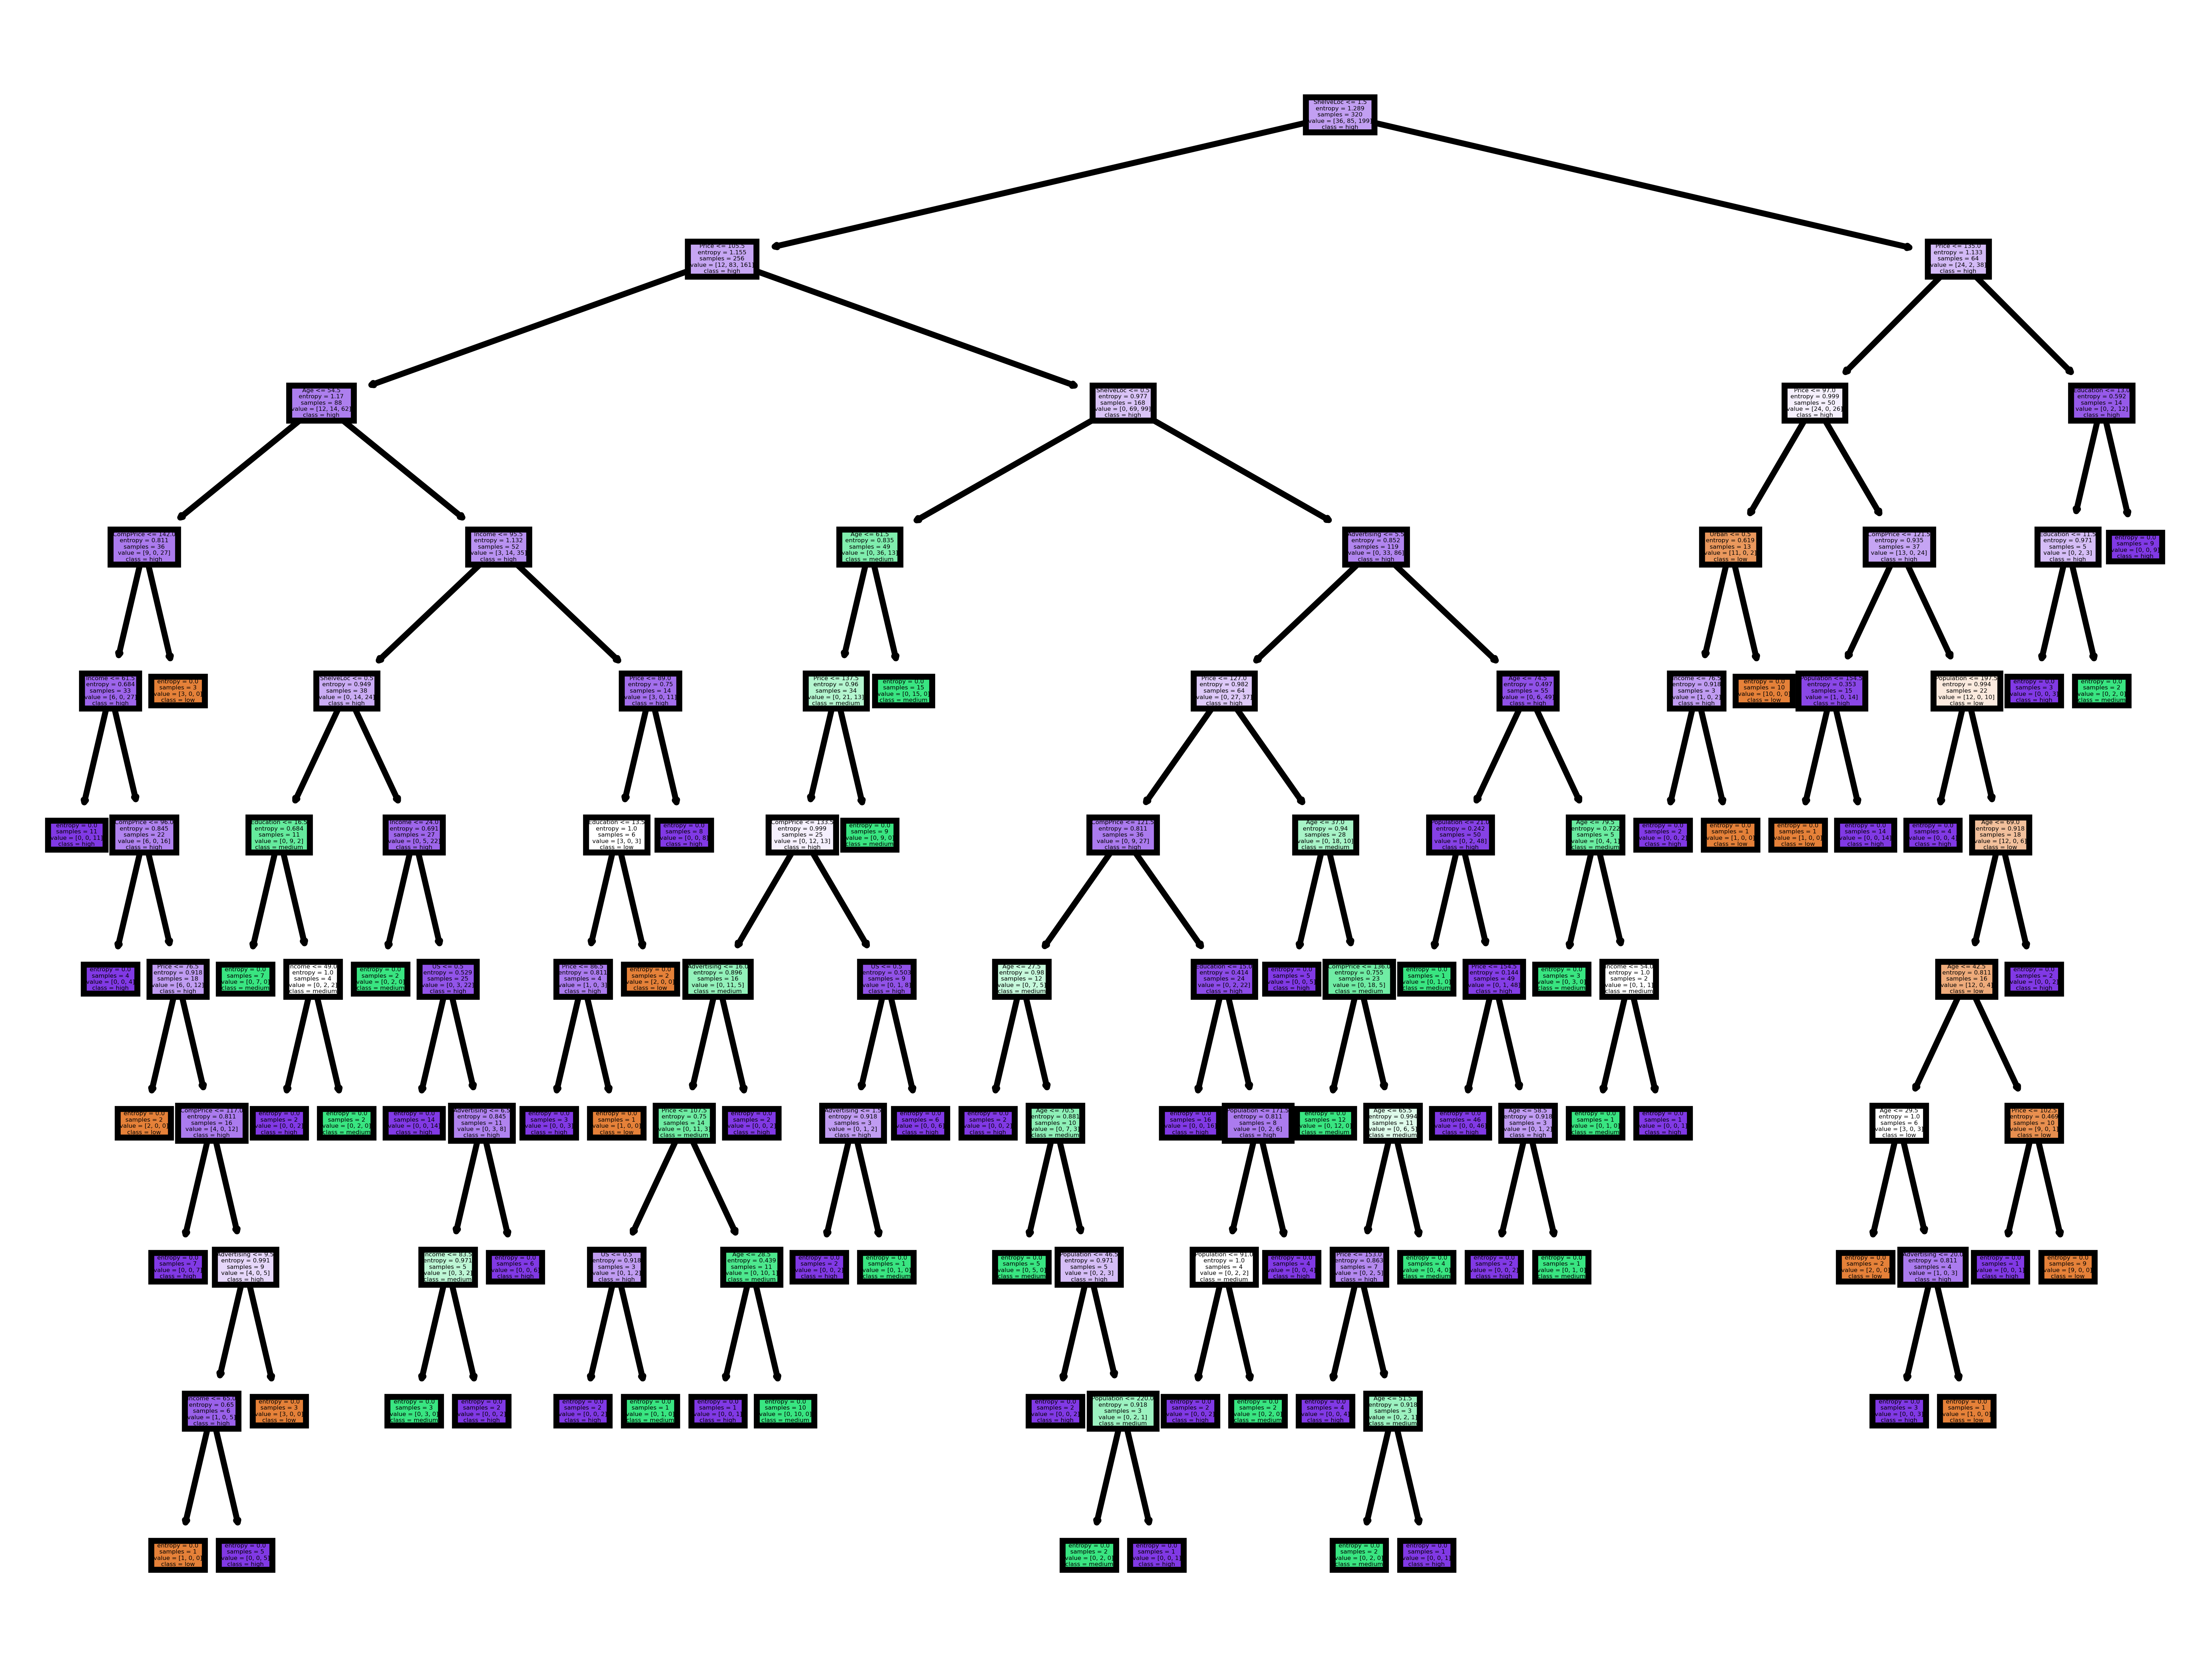

In [17]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['low','medium','high']
plt.figure(dpi=1200)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [18]:
#Predicting on test data

preds = model.predict(x_test)
preds

array(['low', 'low', 'medium', 'low', 'medium', 'low', 'high', 'medium',
       'medium', 'medium', 'low', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'high', 'medium', 'medium', 'medium', 'low',
       'medium', 'low', 'medium', 'medium', 'low', 'medium', 'medium',
       'low', 'medium', 'high', 'low', 'low', 'medium', 'low', 'low',
       'medium', 'medium', 'medium', 'low', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'low', 'high',
       'medium', 'medium', 'medium', 'medium', 'low', 'medium', 'high',
       'high', 'high', 'medium', 'medium', 'low', 'low', 'medium',
       'medium', 'high', 'medium', 'low', 'high', 'medium', 'medium',
       'high', 'medium', 'low', 'low', 'medium', 'medium', 'medium',
       'medium'], dtype=object)

In [19]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        high       0.70      0.47      0.56        15
         low       0.62      0.76      0.68        17
      medium       0.76      0.77      0.76        48

    accuracy                           0.71        80
   macro avg       0.69      0.67      0.67        80
weighted avg       0.72      0.71      0.71        80



In [20]:
# Trying to improve the accuracy by using K-Fold Validation & Pruning

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [22]:
x = X
y = Y

In [23]:
array = company.values
array

array([[  9.5 , 138.  ,  73.  , ...,  17.  ,   1.  ,   1.  ],
       [ 11.22, 111.  ,  48.  , ...,  10.  ,   1.  ,   1.  ],
       [ 10.06, 113.  ,  35.  , ...,  12.  ,   1.  ,   1.  ],
       ...,
       [  7.41, 162.  ,  26.  , ...,  18.  ,   1.  ,   1.  ],
       [  5.94, 100.  ,  79.  , ...,  12.  ,   1.  ,   1.  ],
       [  9.71, 134.  ,  37.  , ...,  16.  ,   1.  ,   1.  ]])

In [218]:
kfold = KFold(n_splits=5)
model1 = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=26)
results = cross_val_score(model,x,y,cv=kfold)
results

array([0.65  , 0.675 , 0.7375, 0.7   , 0.7375])

In [219]:
results.mean()*100.0

70.0

In [220]:
# In this case, we got similar accuracy compared to the original model after pruning & kfold validation